100%|██████████| 9912422/9912422 [00:00<00:00, 73371448.62it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 80063247.74it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 26992847.32it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11265836.05it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 1/1, Loss: 0.04703928339185872
Training complete


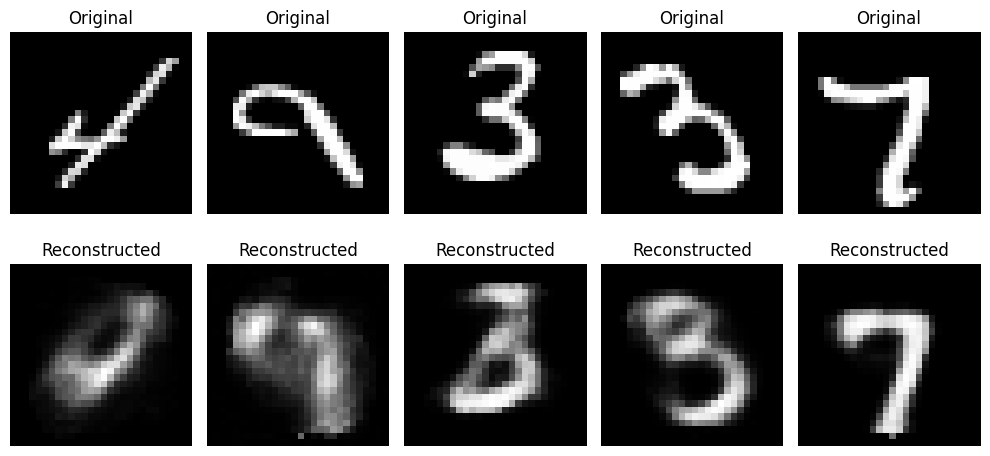

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jan 20 18:42:07 2024

@author: YAVUZ
"""

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 8)
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()  # 0 ile 1 arasında değerler üretir
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
autoencoder = Autoencoder()
transform = transforms.Compose([transforms.ToTensor()])
mnist_train = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
dataloader = DataLoader(mnist_train, batch_size=64, shuffle=True)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
num_epochs = 1
for epoch in range(num_epochs):
 running_loss = 0.0
 for data in dataloader:
     inputs, _ = data
     inputs = inputs.view(inputs.size(0), -1)  # Giriş görüntülerini düzleştir
     optimizer.zero_grad()
     outputs = autoencoder(inputs)
     loss = criterion(outputs, inputs)
     loss.backward()
     optimizer.step()
     running_loss += loss.item()

 print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(dataloader)}")
print("Training complete")
# Choose a batch of images from the dataloader
dataiter = iter(dataloader)
images, _ = next(dataiter)
# Forward pass through the autoencoder
reconstructed = autoencoder(images.view(images.size(0), -1))
# Plot original and reconstructed images
plt.figure(figsize=(10, 5))
for i in range(5):
 # Original images
 plt.subplot(2, 5, i + 1)
 plt.imshow(images[i].squeeze().numpy(), cmap='gray')
 plt.title("Original")
 plt.axis('off')
 # Reconstructed images
 plt.subplot(2, 5, i + 6)
 plt.imshow(reconstructed[i].detach().numpy().reshape(28, 28), cmap='gray')
 plt.title("Reconstructed")
 plt.axis('off')
plt.tight_layout()
plt.show()